In [58]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [59]:
df_credit_bureau = pd.read_csv('CreditBureau.csv')
df_customer_info = pd.read_csv('CustomerInfo.csv')
df_external_score = pd.read_csv('ExternalScore.csv')

In [60]:
df_customer_info.head()

,customer_id,AGE,INCOME,GENDER,EDUCATION,LOAN_PURPOSE,APPLICATION_RECEIVE_TIME,HAS_APPLIED_BEFORE,HAS_INCOME_VERIFICATION,LOAN_WAS_PAID_BACK
0,36493,40,10000000.0,Female,Diploma,Working Capital,09:07:00,No,Yes,1
1,36494,39,15000000.0,Female,Bachelor Degree,Other,15:15:00,No,Yes,1
2,36495,28,15000000.0,Male,Bachelor Degree,Renovation,07:13:00,No,Yes,1
3,36496,28,4000000.0,Male,Bachelor Degree,Renovation,12:05:00,Yes,Yes,1
4,36497,38,10000000.0,Male,Diploma,Renovation,14:35:00,Yes,Yes,0


In [61]:
df_credit_bureau.head()

,customer_id,LOANS_WITHOUT_DELAYS,LOANS_WITH_DELAYS,KNOWN_ASSETS
0,36493,3,3,40000000.0
1,36494,3,0,20000000.0
2,36496,2,1,0.0
3,36497,1,0,40000000.0
4,36498,7,0,NaN


##### Data Exploration

In [62]:
print("Customer Info data shape: ", df_customer_info.shape)
print("Credit Bureau data shape: ", df_credit_bureau.shape)

Customer Info data shape:  (6588, 10)
Credit Bureau data shape:  (5268, 4)


In [63]:
df_credit_bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           5268 non-null   int64  
 1   LOANS_WITHOUT_DELAYS  5268 non-null   int64  
 2   LOANS_WITH_DELAYS     5268 non-null   int64  
 3   KNOWN_ASSETS          3837 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 164.8 KB


In [64]:
df_customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6588 entries, 0 to 6587
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               6588 non-null   int64  
 1   AGE                       6588 non-null   int64  
 2   INCOME                    6586 non-null   float64
 3   GENDER                    6588 non-null   object 
 4   EDUCATION                 6588 non-null   object 
 5   LOAN_PURPOSE              6539 non-null   object 
 6   APPLICATION_RECEIVE_TIME  6588 non-null   object 
 7   HAS_APPLIED_BEFORE        6588 non-null   object 
 8   HAS_INCOME_VERIFICATION   6588 non-null   object 
 9   LOAN_WAS_PAID_BACK        6588 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 514.8+ KB


There are no null values for columns in Customer Info and no null values for Credit Bureau data except Known assets column which indicates a significance to customers.

In [65]:
df_customer_info.describe()

,customer_id,AGE,INCOME,LOAN_WAS_PAID_BACK
count,6588.000000,6588.000000,6.586000e+03,6588.000000
mean,39801.079539,34.443989,8.019131e+06,0.853825
std,1922.288595,7.737636,6.582340e+06,0.353308
min,36493.000000,20.000000,0.000000e+00,0.000000
25%,38139.750000,28.000000,4.000000e+06,1.000000
50%,39786.500000,33.500000,6.000000e+06,1.000000
75%,41453.250000,40.000000,1.000000e+07,1.000000
max,43185.000000,54.000000,1.000000e+08,1.000000


In [66]:
df_credit_bureau.describe()

,customer_id,LOANS_WITHOUT_DELAYS,LOANS_WITH_DELAYS,KNOWN_ASSETS
count,5268.000000,5268.000000,5268.000000,3.837000e+03
mean,39799.389142,1.650152,0.413250,1.287204e+07
std,1921.185055,0.826997,0.891211,1.259531e+07
min,36493.000000,1.000000,0.000000,0.000000e+00
25%,38138.750000,1.000000,0.000000,0.000000e+00
50%,39785.000000,1.000000,0.000000,1.000000e+07
75%,41452.250000,2.000000,0.000000,2.000000e+07
max,43184.000000,8.000000,3.000000,5.000000e+07


There are no visible outliers for both data. We can further understand our data with visual plots.

In [67]:
df_credit_bureau.columns

Index(['customer_id', 'LOANS_WITHOUT_DELAYS', 'LOANS_WITH_DELAYS',
       'KNOWN_ASSETS'],
      dtype='object')

In [68]:
df_customer_info.columns

Index(['customer_id', 'AGE', 'INCOME', 'GENDER', 'EDUCATION', 'LOAN_PURPOSE',
       'APPLICATION_RECEIVE_TIME', 'HAS_APPLIED_BEFORE',
       'HAS_INCOME_VERIFICATION', 'LOAN_WAS_PAID_BACK'],
      dtype='object')

##### Distribution of data plots

In [69]:
df_customer_info['GENDER'].value_counts()

Male      3538
Female    3050
Name: GENDER, dtype: int64

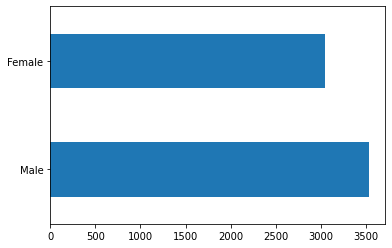

In [70]:
df_customer_info['GENDER'].value_counts().plot(kind='barh');

Working Capital              2044
Renovation                   1812
Credit card                  1486
Electronic unsecured loan     221
Holiday                       197
Investment                    179
Bills                         174
Education                     153
Venture capital               119
Other                          84
Housing loan                   67
Car/Motorcycle                  3
Name: LOAN_PURPOSE, dtype: int64


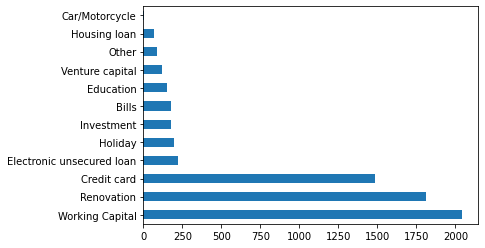

In [71]:
print(df_customer_info['LOAN_PURPOSE'].value_counts())
df_customer_info['LOAN_PURPOSE'].value_counts().plot(kind='barh');

No     4246
Yes    2342
Name: HAS_APPLIED_BEFORE, dtype: int64


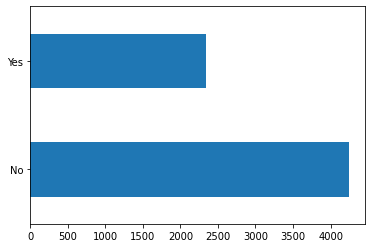

In [72]:
print(df_customer_info['HAS_APPLIED_BEFORE'].value_counts())
df_customer_info['HAS_APPLIED_BEFORE'].value_counts().plot(kind='barh');

1    5625
0     963
Name: LOAN_WAS_PAID_BACK, dtype: int64


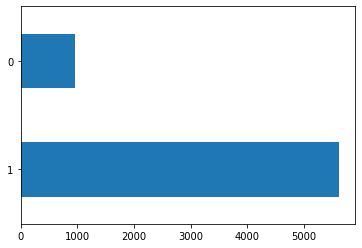

In [73]:
print(df_customer_info['LOAN_WAS_PAID_BACK'].value_counts())
df_customer_info['LOAN_WAS_PAID_BACK'].value_counts().plot(kind='barh');

In [74]:
print(df_customer_info['EDUCATION'].value_counts())

Bachelor Degree                  3448
High School                      1753
Diploma                          1150
Master's Degree/Post graduate     185
Other                              52
Name: EDUCATION, dtype: int64


In [75]:
df_credit_bureau['LOANS_WITH_DELAYS'].value_counts()

0    4138
1     489
3     406
2     235
Name: LOANS_WITH_DELAYS, dtype: int64

1    2780
2    1755
3     576
4     120
5      30
6       5
7       1
8       1
Name: LOANS_WITHOUT_DELAYS, dtype: int64


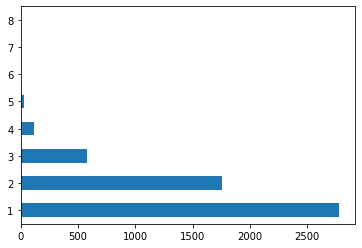

In [76]:
print(df_credit_bureau['LOANS_WITHOUT_DELAYS'].value_counts())
df_credit_bureau['LOANS_WITHOUT_DELAYS'].value_counts().plot(kind='barh');

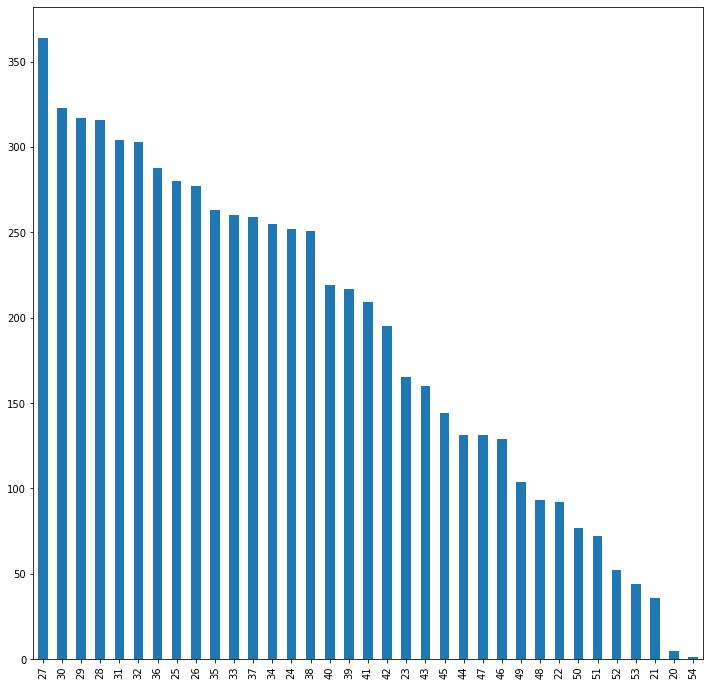

In [77]:
#print(df_customer_info['AGE'].value_counts())
df_customer_info['AGE'].value_counts().plot(kind='bar', figsize=(12,12));

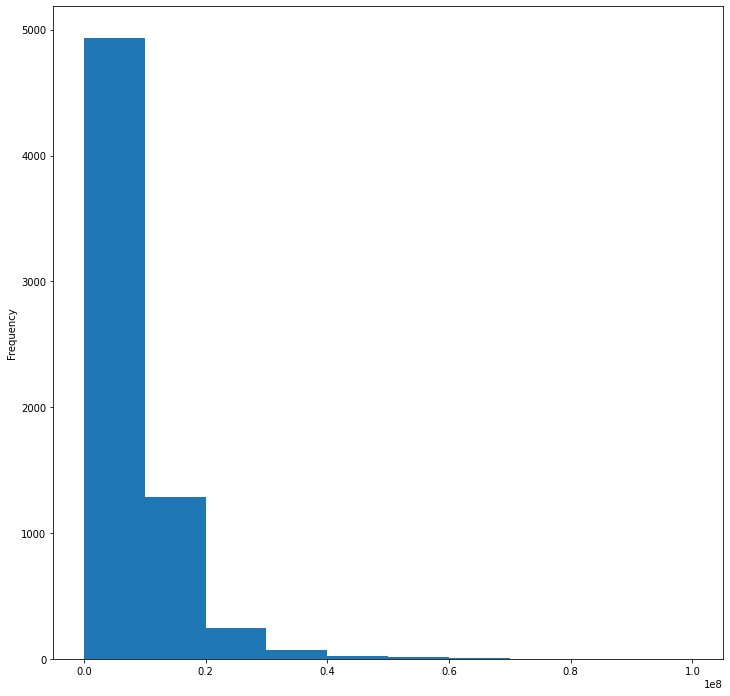

In [78]:
df_customer_info["INCOME"].plot.hist(bins=10, figsize=(12,12));

Observations
- The data distributions have no outliers
- There are only few null values which will be treated after the merge
Loans were taken by those within age range of 20-54


We will merge our dataset in order to understand our customers better and build our model.

In [79]:
df = pd.merge(df_customer_info,df_credit_bureau, on='customer_id', how='outer')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6588 entries, 0 to 6587
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               6588 non-null   int64  
 1   AGE                       6588 non-null   int64  
 2   INCOME                    6586 non-null   float64
 3   GENDER                    6588 non-null   object 
 4   EDUCATION                 6588 non-null   object 
 5   LOAN_PURPOSE              6539 non-null   object 
 6   APPLICATION_RECEIVE_TIME  6588 non-null   object 
 7   HAS_APPLIED_BEFORE        6588 non-null   object 
 8   HAS_INCOME_VERIFICATION   6588 non-null   object 
 9   LOAN_WAS_PAID_BACK        6588 non-null   int64  
 10  LOANS_WITHOUT_DELAYS      5268 non-null   float64
 11  LOANS_WITH_DELAYS         5268 non-null   float64
 12  KNOWN_ASSETS              3837 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 720.6+ KB


In [81]:
df.isnull().sum()

customer_id                    0
AGE                            0
INCOME                         2
GENDER                         0
EDUCATION                      0
LOAN_PURPOSE                  49
APPLICATION_RECEIVE_TIME       0
HAS_APPLIED_BEFORE             0
HAS_INCOME_VERIFICATION        0
LOAN_WAS_PAID_BACK             0
LOANS_WITHOUT_DELAYS        1320
LOANS_WITH_DELAYS           1320
KNOWN_ASSETS                2751
dtype: int64

After the merge we see some null values, since null values for the last 3 columns is quite large we will fill it with 0 rather than dropping the entire rows.

We will fill income with the mean income and fill purpose of loan with "Other"


In [82]:
df['LOANS_WITHOUT_DELAYS'].fillna(value=0, inplace=True)
df['LOANS_WITH_DELAYS'].fillna(value=0, inplace=True)
df['KNOWN_ASSETS'].fillna(value=0, inplace=True)
df['LOAN_PURPOSE'].fillna(value='Other', inplace=True)
df['INCOME'].fillna(value=df['INCOME'].mean(), inplace=True)

In [83]:
df.isnull().sum()

customer_id                 0
AGE                         0
INCOME                      0
GENDER                      0
EDUCATION                   0
LOAN_PURPOSE                0
APPLICATION_RECEIVE_TIME    0
HAS_APPLIED_BEFORE          0
HAS_INCOME_VERIFICATION     0
LOAN_WAS_PAID_BACK          0
LOANS_WITHOUT_DELAYS        0
LOANS_WITH_DELAYS           0
KNOWN_ASSETS                0
dtype: int64

In [84]:
df.head()

,customer_id,AGE,INCOME,GENDER,EDUCATION,LOAN_PURPOSE,APPLICATION_RECEIVE_TIME,HAS_APPLIED_BEFORE,HAS_INCOME_VERIFICATION,LOAN_WAS_PAID_BACK,LOANS_WITHOUT_DELAYS,LOANS_WITH_DELAYS,KNOWN_ASSETS
0,36493,40,10000000.0,Female,Diploma,Working Capital,09:07:00,No,Yes,1,3.0,3.0,40000000.0
1,36494,39,15000000.0,Female,Bachelor Degree,Other,15:15:00,No,Yes,1,3.0,0.0,20000000.0
2,36495,28,15000000.0,Male,Bachelor Degree,Renovation,07:13:00,No,Yes,1,0.0,0.0,0.0
3,36496,28,4000000.0,Male,Bachelor Degree,Renovation,12:05:00,Yes,Yes,1,2.0,1.0,0.0
4,36497,38,10000000.0,Male,Diploma,Renovation,14:35:00,Yes,Yes,0,1.0,0.0,40000000.0


##### Data Preprocessing

Converting our categorical variables to dummy values

In [85]:
cat_vars=['EDUCATION', 'LOAN_PURPOSE', 'GENDER', 'HAS_APPLIED_BEFORE', 'HAS_INCOME_VERIFICATION']
for var in cat_vars:
 cat_list='var'+'_'+var
 cat_list = pd.get_dummies(df[var], prefix=var)
 df1=df.join(cat_list)
 df=df1
cat_vars= ['EDUCATION', 'LOAN_PURPOSE', 'GENDER', 'HAS_APPLIED_BEFORE', 'HAS_INCOME_VERIFICATION']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [86]:
data_final=df[to_keep]
data_final.drop(['customer_id', 'APPLICATION_RECEIVE_TIME'], axis=1, inplace=True)
data_final.columns.values

C:\Users\Linda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


array(['AGE', 'INCOME', 'LOAN_WAS_PAID_BACK', 'LOANS_WITHOUT_DELAYS',
       'LOANS_WITH_DELAYS', 'KNOWN_ASSETS', 'EDUCATION_Bachelor Degree',
       'EDUCATION_Diploma', 'EDUCATION_High School',
       "EDUCATION_Master's Degree/Post graduate", 'EDUCATION_Other',
       'LOAN_PURPOSE_Bills', 'LOAN_PURPOSE_Car/Motorcycle',
       'LOAN_PURPOSE_Credit card', 'LOAN_PURPOSE_Education',
       'LOAN_PURPOSE_Electronic unsecured loan', 'LOAN_PURPOSE_Holiday',
       'LOAN_PURPOSE_Housing loan', 'LOAN_PURPOSE_Investment',
       'LOAN_PURPOSE_Other', 'LOAN_PURPOSE_Renovation',
       'LOAN_PURPOSE_Venture capital', 'LOAN_PURPOSE_Working Capital',
       'GENDER_Female', 'GENDER_Male', 'HAS_APPLIED_BEFORE_No',
       'HAS_APPLIED_BEFORE_Yes', 'HAS_INCOME_VERIFICATION_No',
       'HAS_INCOME_VERIFICATION_Yes'], dtype=object)

In [87]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6588 entries, 0 to 6587
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   AGE                                      6588 non-null   int64  
 1   INCOME                                   6588 non-null   float64
 2   LOAN_WAS_PAID_BACK                       6588 non-null   int64  
 3   LOANS_WITHOUT_DELAYS                     6588 non-null   float64
 4   LOANS_WITH_DELAYS                        6588 non-null   float64
 5   KNOWN_ASSETS                             6588 non-null   float64
 6   EDUCATION_Bachelor Degree                6588 non-null   uint8  
 7   EDUCATION_Diploma                        6588 non-null   uint8  
 8   EDUCATION_High School                    6588 non-null   uint8  
 9   EDUCATION_Master's Degree/Post graduate  6588 non-null   uint8  
 10  EDUCATION_Other                          6588 no

We have all our data in the right datatype for building model, we will now split our data into train and test and balance samples

But before then, let's see if our target data - LOAN_WAS_PAID_BACK is balnaced.

In [88]:
X = data_final.loc[:, data_final.columns != 'LOAN_WAS_PAID_BACK']
y = df.loc[:, df.columns == 'LOAN_WAS_PAID_BACK']

In [89]:
y.value_counts()

LOAN_WAS_PAID_BACK
1                     5625
0                      963
dtype: int64

This shows that data is imbalanced, hence we will add class_weight balanced parameter

Ranking features according to importance to model

In [90]:

logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(X, y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True False  True  True  True  True False False False False
  True False False False False False False  True False False  True  True
  True  True False  True]
[ 1  1  1  8  1  1  1  1 10 12  6 14  1  9  5  3 13 11  4  1  7  2  1  1
  1  1 15  1]


In [91]:
data_X1 = pd.DataFrame({
 'Feature': X.columns,
 'Importance': rfe.ranking_},)
data_X1.sort_values(by=['Importance'])

,Feature,Importance
0,AGE,1
25,HAS_APPLIED_BEFORE_Yes,1
24,HAS_APPLIED_BEFORE_No,1
23,GENDER_Male,1
22,GENDER_Female,1
19,LOAN_PURPOSE_Renovation,1
12,LOAN_PURPOSE_Credit card,1
27,HAS_INCOME_VERIFICATION_Yes,1
1,INCOME,1
2,LOANS_WITHOUT_DELAYS,1


In [92]:
#Since we've identified features that affected model most, let's use those
cols=[]
for i in range (0, len(data_X1['Importance'])):
 if data_X1['Importance'][i] == 1:
  cols.append(data_X1['Feature'][i])
print(cols)
print(len(cols))

['AGE', 'INCOME', 'LOANS_WITHOUT_DELAYS', 'KNOWN_ASSETS', 'EDUCATION_Bachelor Degree', 'EDUCATION_Diploma', 'EDUCATION_High School', 'LOAN_PURPOSE_Credit card', 'LOAN_PURPOSE_Renovation', 'GENDER_Female', 'GENDER_Male', 'HAS_APPLIED_BEFORE_No', 'HAS_APPLIED_BEFORE_Yes', 'HAS_INCOME_VERIFICATION_Yes']
14


#### Modelling

##### Logistic Regression

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
logreg = LogisticRegression(class_weight='balanced', penalty='l2')
logreg.fit(X_train, y_train)

C:\Users\Linda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced')

#### Evaluation

In [94]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.85


In [95]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[   3  195]
 [   8 1112]]


In [96]:
print('The result is telling us that we have: ',(confusion_matrix[0,0]+confusion_matrix[1,1]),'correct predictions')
print('The result is telling us that we have: ',(confusion_matrix[0,1]+confusion_matrix[1,0]),'incorrect predictions')
print('We have a total predictions of: ',(confusion_matrix.sum()))

The result is telling us that we have:  1115 correct predictions
The result is telling us that we have:  203 incorrect predictions
We have a total predictions of:  1318


In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.27      0.02      0.03       198
           1       0.85      0.99      0.92      1120

    accuracy                           0.85      1318
   macro avg       0.56      0.50      0.47      1318
weighted avg       0.76      0.85      0.78      1318



#### Result

In [99]:
data_final['probability'] = logreg.predict_proba(data_final[X_train.columns])[:,1]
data_final['customer_id'] = df['customer_id']
data_final[['customer_id', 'probability']].head(10)

C:\Users\Linda\AppData\Local\Temp/ipykernel_26328/3666024979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['probability'] = logreg.predict_proba(data_final[X_train.columns])[:,1]
C:\Users\Linda\AppData\Local\Temp/ipykernel_26328/3666024979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['customer_id'] = df['customer_id']


,customer_id,probability
0,36493,0.675538
1,36494,0.608951
2,36495,0.528557
3,36496,0.507623
4,36497,0.675538
5,36498,0.515243
6,36499,0.556079
7,36500,0.526657
8,36501,0.596172
9,36502,0.548539


In [100]:
customer_score = data_final[['customer_id', 'probability']]

##### Business Translation

From the above prediction, if a new customer comes and 'AGE' = 30, 'INCOME'=50000, 'LOANS_WITHOUT_DELAYS'=0, 'KNOWN_ASSETS'=0, 'EDUCATION_Bachelor Degree'=1, 'GENDER_Female'=1, 'HAS_APPLIED_BEFORE_No'=1, 'HAS_INCOME_VERIFICATION_Yes'=1 then we can predict outcome as below

In [107]:
new_data = np.array([30,5000,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,1]).reshape(1, -1)
new_pred=logreg.predict_proba(new_data)[:,1][0]
print("\033[1m This new loan applicant has a {:.2%}".format(new_pred), "chance of defaulting on a new debt")

 This new loan applicant has a 50.00% chance of defaulting on a new debt


C:\Users\Linda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
